In [1]:
using Origin
using SparseMatrix
using NMarkov
using SparseArrays
using Plots
using MAT
using JSON
using Distributions
using JuliaDot
using Surrogates

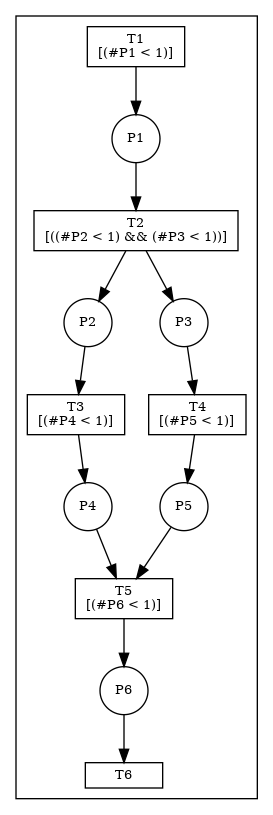

In [97]:
run(`./gospn view -i production.spn -o tmp.dot`)
drawfile("tmp.dot")

In [114]:
function getrwd(;lambda = 1.0, mu1 = 2.0, mu2 = 2.0, mu3 = 2.0, mu4 = 2.0, mu5 = 2.0, tend = 100.0)
    run(`./gospn mark -i production.spn -o result.mat -post "lambda=$lambda; mu1=$mu1; mu2=$mu2; mu3=$mu3; mu4=$mu4; mu5=$mu5"`);
    matfile = matopen("result.mat");
    Q = read(matfile, "G0G0E");
    r1 = read(matfile, "rwd1G0");
    r2 = read(matfile, "rwd2G0");
    r3 = read(matfile, "rwd3G0");
    x0 = read(matfile, "initG0");
    ts = range(0.0, tend, 100)
    irwd1, crwd1, xt1, cxt1 = tran(Q, x0, r1, ts, forward=:T);
    irwd2, crwd2, xt2, cxt2 = tran(Q, x0, r2, ts, forward=:T);
    (sum(cxt1 .* r1), sum(cxt2 .* r2), sum(xt1 .* r3), sum(xt2 .* r3))
end

getrwd (generic function with 1 method)

In [112]:
# lambda = 1.0; mu1 = 2.0; mu2 = 2.0; mu3 = 2.0; mu4 = 2.0; mu5 = 2.0; tend = 100.0
# run(`./gospn mark -i production.spn -o result.mat -post "lambda=$lambda; mu1=$mu1; mu2=$mu2; mu3=$mu3; mu4=$mu4; mu5=$mu5"`);
# matfile = matopen("result.mat");
# Q = read(matfile, "G0G0E");
# r1 = read(matfile, "rwd1G0");
# r2 = read(matfile, "rwd2G0");
# r3 = read(matfile, "rwd3G0");
# r4 = read(matfile, "rwd4G0");
# x0 = read(matfile, "initG0");
# ts = range(0.0, tend, 100)
# irwd1, crwd1, xt1, cxt1 = tran(Q, x0, r1, ts, forward=:T);
# irwd2, crwd2, xt2, cxt2 = tran(Q, x0, r2, ts, forward=:T);
# irwd3, crwd3, xt3, cxt3 = tran(Q, x0, r3, ts, forward=:T);
# irwd4, crwd4, xt4, cxt4 = tran(Q, x0, r4, ts, forward=:T);

Create marking...

done
computation time : 0.6535 (sec)
# of total states         : 107811 (551760)
# of total EXP/GEN states : 107811 (551760)
# of total IMM states     : 0 (0)
# of total ABS states     : 0 (0)
(EXP)
  # of EXP/GEN states ( G0) : 107811 (551760) 



In [137]:
function getrwd_sim(;lambda = 1.0, mu1 = 2.0, mu2 = 2.0, mu3 = 2.0, mu4 = 2.0, mu5 = 2.0, tend = 100.0, n = 100)
    config = Dict(
        "time" => tend,   # the stop condition for one simulation
        "firings" => 0,       # the stop condition for one simulation
        "simulations" => n, # the number of simulation runs
        "rewards" => ["rwd1", "rwd2", "rwd3"]
    )
    open("config.json", "w") do f 
        write(f, JSON.json(config)) 
    end;
    run(`./gospn sim -i production.spn -o s.mat -f config.json -s 12345 -post "lambda=$lambda; mu1=$mu1; mu2=$mu2; mu3=$mu3; mu4=$mu4; mu5=$mu5"`)
    matfile = matopen("s.mat")
    keys(read(matfile))
    rwd1 = read(matfile, "rwd1_crwd")
    rwd2 = read(matfile, "rwd2_crwd")
    rwd3 = read(matfile, "rwd3_irwd")
    (rwd1=rwd1, rwd2=rwd2, rwd3=rwd3)
end

getrwd_sim (generic function with 1 method)

In [139]:
getrwd_sim(n=10)

Run simulation...done
computation time : 0.0222 (sec)


(rwd1 = [0.0, 0.16812585367016197, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], rwd2 = [104.88181697424369, 85.751450078119, 105.53824762543098, 98.46902064288595, 85.88142171194805, 71.70915268935016, 97.56017503824056, 105.91831700473418, 91.68789810976003, 82.2745177429996], rwd3 = [4.0, 6.0, 9.0, 6.0, 0.0, 8.0, 16.0, 9.0, 6.0, 13.0])

In [205]:
using Surrogates

num_samples = 100
lb = 0.0
ub = 5.0

lam = Surrogates.sample(num_samples, lb, ub, SobolSample())
# y = [log(getrwd(lambda=v)[1]) for v = lam]
y = [mean(getrwd_sim(lambda=v, n=100)[2]) for v = lam]

# alpha = 2.0
# n = 6
# my_func = LobachevskySurrogate(lam, y, lb, ub, alpha=alpha, n=n)
my_func = Surrogates.Kriging(lam, y, lb, ub)


Run simulation...done
computation time : 0.0142 (sec)
Run simulation...

done
computation time : 0.1972 (sec)
Run simulation...

done
computation time : 0.1852 (sec)
Run simulation...

done
computation time : 0.1276 (sec)
Run simulation...

done
computation time : 0.1635 (sec)
Run simulation...

done
computation time : 0.1759 (sec)
Run simulation...

done
computation time : 0.1709 (sec)
Run simulation...done
computation time : 0.0684 (sec)


Run simulation...

done
computation time : 0.1000 (sec)
Run simulation...

done
computation time : 0.1723 (sec)
Run simulation...

done
computation time : 0.1765 (sec)
Run simulation...

done
computation time : 0.1709 (sec)
Run simulation...

done
computation time : 0.1596 (sec)
Run simulation...

done
computation time : 0.1805 (sec)
Run simulation...

done
computation time : 0.1884 (sec)
Run simulation...done
computation time : 0.0443 (sec)
Run simulation...

done
computation time : 0.0609 (sec)
Run simulation...

done
computation time : 0.1841 (sec)
Run simulation...

done
computation time : 0.1881 (sec)
Run simulation...

done
computation time : 0.2034 (sec)
Run simulation...

done
computation time : 0.1791 (sec)
Run simulation...

done
computation time : 0.1779 (sec)
Run simulation...

done
computation time : 0.1783 (sec)


Run simulation...

done
computation time : 0.1215 (sec)
Run simulation...

done
computation time : 0.0892 (sec)
Run simulation...

done
computation time : 0.1738 (sec)
Run simulation...

done
computation time : 0.1735 (sec)
Run simulation...

done
computation time : 0.1725 (sec)
Run simulation...

done
computation time : 0.1522 (sec)
Run simulation...

done
computation time : 0.1817 (sec)
Run simulation...

done
computation time : 0.1768 (sec)


Run simulation...done
computation time : 0.0286 (sec)
Run simulation...done
computation time : 0.0190 (sec)
Run simulation...

done
computation time : 0.1718 (sec)
Run simulation...

done
computation time : 0.1840 (sec)
Run simulation...

done
computation time : 0.1659 (sec)
Run simulation...

done
computation time : 0.1701 (sec)
Run simulation...

done
computation time : 0.1834 (sec)
Run simulation...

done
computation time : 0.1740 (sec)
Run simulation...

done
computation time : 0.0834 (sec)
Run simulation...

done
computation time : 0.1120 (sec)
Run simulation...

done
computation time : 0.1865 (sec)
Run simulation...

done
computation time : 0.1760 (sec)
Run simulation...

done
computation time : 0.1704 (sec)
Run simulation...

done
computation time : 0.1599 (sec)
Run simulation...

done
computation time : 0.1727 (sec)
Run simulation...

done
computation time : 0.1716 (sec)
Run simulation...

done
computation time : 0.0501 (sec)
Run simulation...done
computation time : 0.0334 (sec)
Run simulation...

done
computation time : 0.1953 (sec)
Run simulation...

done
computation time : 0.1727 (sec)
Run simulation...

done
computation time : 0.1468 (sec)
Run simulation...

done
computation time : 0.1658 (sec)
Run simulation...

done
computation time : 0.1734 (sec)
Run simulation...

done
computation time : 0.1714 (sec)
Run simulation...

done
computation time : 0.0948 (sec)
Run simulation...

done
computation time : 0.0650 (sec)
Run simulation...

done
computation time : 0.1786 (sec)
Run simulation...

done
computation time : 0.1766 (sec)


Run simulation...

done
computation time : 0.1661 (sec)
Run simulation...

done
computation time : 0.1259 (sec)
Run simulation...

done
computation time : 0.1729 (sec)
Run simulation...

done
computation time : 0.1695 (sec)
Run simulation...done
computation time : 0.0041 (sec)
Run simulation...done
computation time : 0.0063 (sec)
Run simulation...

done
computation time : 0.1688 (sec)
Run simulation...

done
computation time : 0.1750 (sec)
Run simulation...

done
computation time : 0.1266 (sec)
Run simulation...

done
computation time : 0.1609 (sec)
Run simulation...

done
computation time : 0.1714 (sec)
Run simulation...

done
computation time : 0.1719 (sec)
Run simulation...done
computation time : 0.0667 (sec)


Run simulation...

done
computation time : 0.0963 (sec)
Run simulation...

done
computation time : 0.1761 (sec)
Run simulation...

done
computation time : 0.1851 (sec)
Run simulation...

done
computation time : 0.1696 (sec)
Run simulation...

done
computation time : 0.1555 (sec)
Run simulation...

done
computation time : 0.2706 (sec)
Run simulation...

done
computation time : 0.1746 (sec)
Run simulation...

done
computation time : 0.0371 (sec)
Run simulation...done
computation time : 0.0501 (sec)


Run simulation...

done
computation time : 0.1756 (sec)
Run simulation...

done
computation time : 0.1744 (sec)
Run simulation...

done
computation time : 0.1619 (sec)
Run simulation...

done
computation time : 0.1836 (sec)
Run simulation...

done
computation time : 0.1914 (sec)
Run simulation...

done
computation time : 0.1772 (sec)
Run simulation...

done
computation time : 0.1144 (sec)
Run simulation...

done
computation time : 0.0822 (sec)
Run simulation...

done
computation time : 0.1800 (sec)
Run simulation...

done
computation time : 0.1806 (sec)
Run simulation...

done
computation time : 0.1701 (sec)
Run simulation...

done
computation time : 0.1460 (sec)
Run simulation...

done
computation time : 0.1716 (sec)
Run simulation...

done
computation time : 0.1763 (sec)


Run simulation...done
computation time : 0.0206 (sec)
Run simulation...done
computation time : 0.0282 (sec)
Run simulation...

done
computation time : 0.1792 (sec)
Run simulation...

done
computation time : 0.1817 (sec)
Run simulation...

done
computation time : 0.1573 (sec)


(::Kriging{Vector{Float64}, Vector{Float64}, Float64, Float64, Float64, Float64, Float64, Vector{Float64}, Float64, Matrix{Float64}}) (generic function with 2 methods)

In [194]:
y

100-element Vector{Float64}:
   3.8099387064434027
  97.01885495822222
 147.33790105141503
  55.02877921717838
  71.06337756835941
 150.68692198016035
 124.16031130746464
  30.7014599474168
  40.97164685175186
 127.63815019485007
   ⋮
  80.88296051286524
  58.817271203329916
 137.03678832614884
 103.75774842413053
   7.761905989148988
  11.118602885287846
 106.02864873070175
 143.73235105065373
  60.12258902346446

In [206]:
xx = range(lb, ub, 100)
yy = my_func.(xx)

100-element Vector{Float64}:
  -0.7394507490038222
   4.61642802053268
   9.840726225642925
  14.948320513597196
  19.956254413357442
  24.882830511318957
  29.74672251870527
  34.56612976256895
  39.357994868309675
  44.13730335015009
   ⋮
 156.285745003354
 156.21186049777918
 156.1542244556682
 156.13099813972678
 156.16466042116247
 156.28213109665978
 156.5147918060453
 156.89839737145542
 157.47287284676588

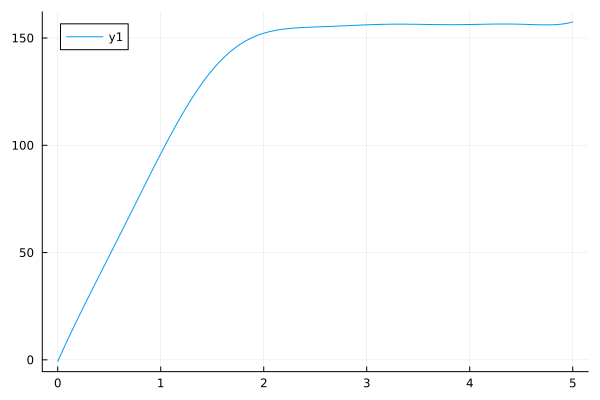

In [207]:
plot(xx, yy)

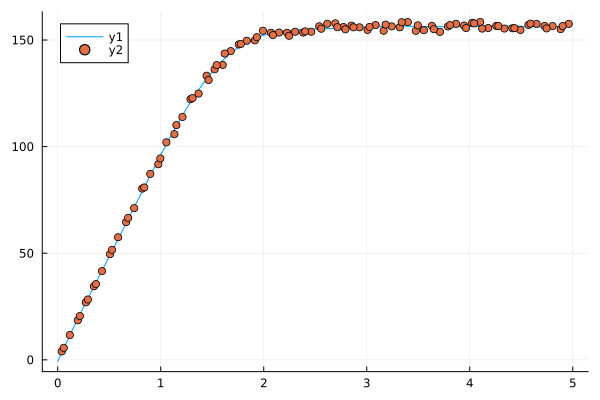

In [208]:
plot!(lam, y, st=:scatter)

In [1]:
using Surrogates
num_samples = 10
lb = 0.0
ub = 10.0

#Sampling
x = sample(num_samples,lb,ub,SobolSample())
f = x-> log(x)*x^2+x^3
y = f.(x)

#Creating surrogate
alpha = 2.0
n = 6
my_lobachevsky = LobachevskySurrogate(x,y,lb,ub,alpha=alpha,n=n)

#Approximating value at 5.0
value = my_lobachevsky(5.0)

#Adding more data points
surrogate_optimize(f,SRBF(),lb,ub,my_lobachevsky,UniformSample())

#New approximation
value = my_lobachevsky(5.0)

Out of sampling points


135.038428627116